<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/Etivity3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etivity 3

Welcome to etivity3.

## Task 2
Initially, we model the dataset for the well known k-means algorithm and suggest a suitable value for k using tSNE and PCA methods.
## Task 3
Elbow method is used to predict a value for k and compared to above suggestions.

K Means algorithm run again for optimum suggested value and conclusions drawn from the resulting data.

## Task 4
We run up the different algorithms found in by research at the start of this week and to compare the cluster plots for each of the algorithms and draw a conclusion.

The algorithms being uses here are:
*   DBScan
*   Gaussian mixture modelling

## Evaluation of other clustering algorithms
Alternative clustering algorithms considered are:

1.   DBScan
This is similar to the means shifting clustering algorithm as it does not need you to select the number of clusters and also, it handles outliers as noise.  It is not great with clusters of different densities.

3.   Gaussian Mixture Models
This algorihm uses the mean AND the standard deviation values to estimate the shape and size of the clusters.  Knowing statistics, this make me more happier as I know they better describe the data.

# K Means algorithm investigation on loans dataset



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [999]:
url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/loans_train_prepared.csv'
df = pd.read_csv(url_train, index_col=0)
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 15)


# A simple visualisation of our dataset

We can simply plot the x.y values of our dataset to get a simple visualisation.

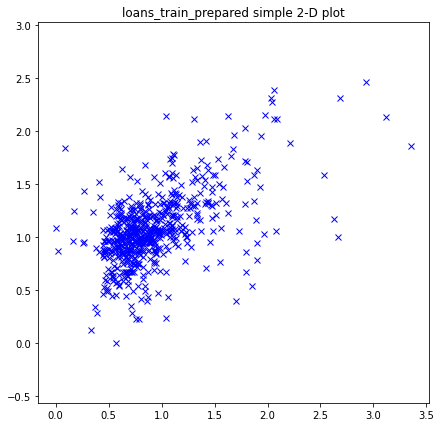

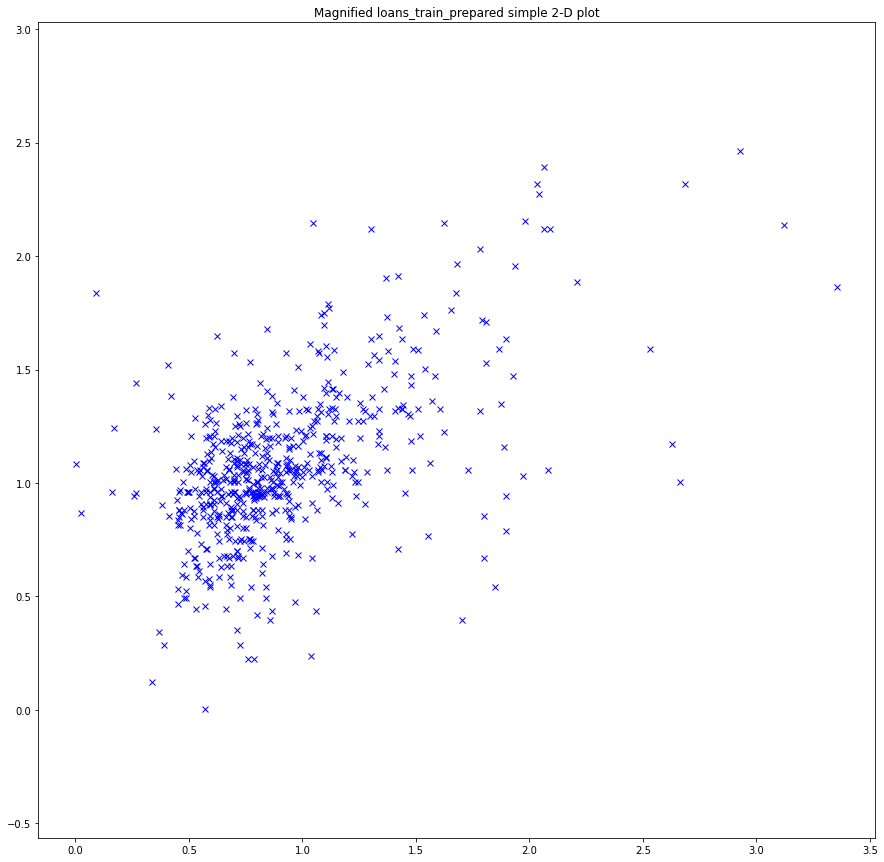

In [1000]:
url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/loans_train_prepared.csv'
df = pd.read_csv(url_train, index_col=0)
X = np.array(df.values, dtype=float)

plt.figure(figsize=(7, 7))
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis('equal')
plt.title("loans_train_prepared simple 2-D plot")
plt.show()

plt.figure(figsize=(15, 15))
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis('equal')
plt.title("Magnified loans_train_prepared simple 2-D plot")
plt.show()


This reveals a shape which will recur in graphs below using the different types of clustering algorithm.

### Rescaling
There is no need to rescale this dataset as it is all in normalised form (0..1)

Setup the plot definitions (based on etivity lab example given)

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')


## Best k Means value for the loans dataset
Initially we pick a value for k (k=2) and model this to ensure our logic is correct.  We then use specific methods to suggest an optimum value for k and visualise these k values.

In [0]:
k = 2

transformation complete


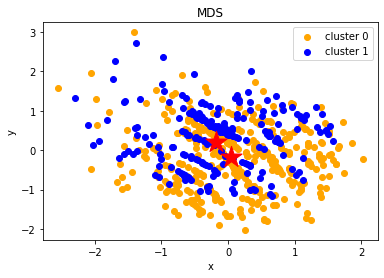

In [1003]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]  
XYcoordinates = manifold.MDS(n_components=3).fit_transform(data_and_centers)
print("transformation complete")
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

Apply t-SNE 

In [1004]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


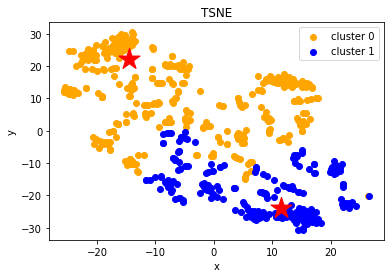

In [1005]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [0]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

Adding the cluster number to the dataset as a column allows us to sort the data on the cluster number to see if there are patterns with the data.

In [1007]:
df.sort_values(by = 'cluster' )

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
Dependents,,,,,,,,,,,,,,,,
0.000000,1.084523,1.058140,0.750,1,1,0,0,0,0,0,0,0,1,1,0.841086,0
0.000000,0.996775,1.025319,0.750,0,1,0,0,0,0,0,0,0,0,0,0.743287,0
0.000000,1.126170,1.074155,0.750,1,1,0,0,0,0,0,1,0,0,0,0.887170,0
0.000000,1.191354,1.115650,0.750,1,1,0,0,0,1,0,0,0,0,1,0.958903,0
0.000000,0.686104,0.849455,0.625,1,1,0,1,0,0,0,0,0,1,1,0.866087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.666667,0.492468,0.962197,0.375,1,1,0,1,0,0,0,1,1,0,1,0.503229,1
0.000000,0.967378,0.894822,0.750,1,1,0,0,0,0,0,0,1,0,1,0.710297,1
1.000000,0.843405,1.679268,0.750,1,1,0,1,0,0,0,0,1,0,0,1.405449,1


In [1008]:
df.groupby('cluster').mean()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,
0,0.918059,1.074684,0.707152,0.845144,0.832021,0.018373,0.648294,0.002625,0.131234,0.057743,0.230971,0.0,0.530184,0.637795,0.869577
1,0.914184,1.078738,0.723498,0.871245,0.738197,0.025751,0.648069,0.008584,0.137339,0.042918,0.197425,1.0,0.000000,0.768240,0.851417


### Conclusion for k=2

The only conclusion that could be drawn here is that there is a pattern in the location of the property (urban vs semi-urban)

## Suggesting an optimum value for k

We can do this with PCA and t-SNE methods and use the elbow method to find values for k.

Using PCA and T-SNE methods, we plot these to find suggestions for the size of k.


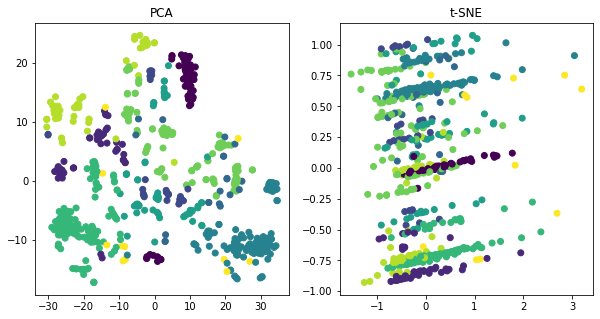

In [1009]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/loans_train_prepared.csv'
df = pd.read_csv(url_train, index_col=0)
X = np.array(df.values, dtype=float)

X_tsne = TSNE(learning_rate=200).fit_transform(X)
X_pca = PCA().fit_transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("PCA")
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.subplot(122)
plt.title("t-SNE")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)


### Conclusion

These PCA and t-SNE plots suggest that there are optimally 6 clusters.  We will see what the elbow plot suggests.

## Task 3

We use the elbow method [(Towards Data Science, 2018)](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203) to visually examine where the elbow is at:


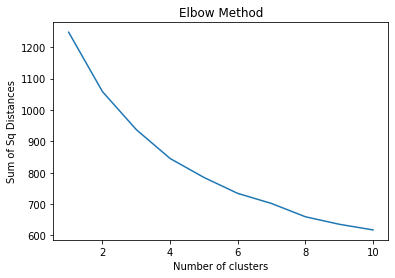

In [1010]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Sq Distances')
plt.show()

### Conclusion
The graph for the elbow method does not clearly show an elbow.  The graph is quite constant in its rate of decline in slope value.  It is arguable that the cluster k value should be 6 or 8.

Based on the suggestions above and this graph, we conclude that a value of k=6 is the optimum value for pattern analysis by clustering.

In [0]:
k = 6

transformation complete


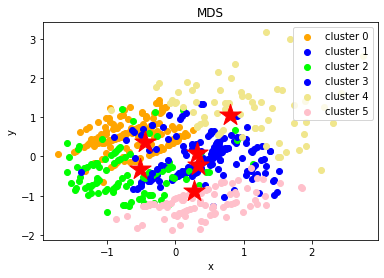

In [1012]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]  
XYcoordinates = manifold.MDS(n_components=3).fit_transform(data_and_centers)
print("transformation complete")
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

transformation complete


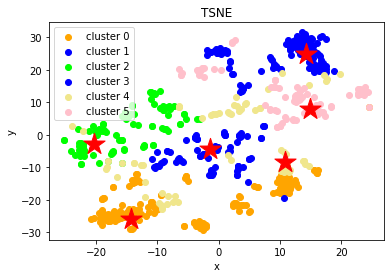

In [1013]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')


In [1014]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.sort_values(by = 'cluster' )


,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
Dependents,,,,,,,,,,,,,,,,
0.333333,1.101869,1.207803,0.750,1,1,0,1,0,0,0,0,0,0,1,0.860305,0
0.666667,0.867734,1.198493,0.750,1,1,0,1,0,0,0,0,0,0,1,0.810421,0
0.000000,1.422813,0.707195,0.375,1,1,0,1,0,0,0,0,0,1,1,1.210190,0
0.000000,0.799235,1.304870,0.750,1,1,0,1,0,0,0,0,0,0,1,0.964712,0
0.000000,1.224133,1.100290,0.750,1,0,0,1,0,1,0,1,0,0,1,0.994803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.000000,0.671501,1.105436,0.750,1,0,0,1,0,0,1,0,1,0,1,0.762654,5
0.333333,1.254798,1.196152,0.750,1,0,0,0,0,1,0,0,1,0,1,1.028287,5
0.000000,0.987370,0.991384,0.750,1,1,0,0,0,0,1,0,1,0,1,0.732745,5


In [1015]:
df.groupby('cluster').mean()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,
0,0.807672,1.043077,0.694268,0.993631,0.961783,0.006369,1.000000,0.000000,0.114650,0.070064,0.242038,0.000000,0.630573,0.885350,0.792686
1,0.870090,1.094960,0.723380,0.990741,1.000000,0.000000,1.000000,0.000000,0.129630,0.018519,0.194444,1.000000,0.000000,0.888889,0.842993
2,0.793297,0.912656,0.738208,0.933962,0.594340,0.009434,0.000000,0.009434,0.084906,0.075472,0.216981,0.000000,0.547170,0.688679,0.653869
3,0.795210,1.027135,0.707440,0.250000,0.892857,0.047619,0.833333,0.000000,0.083333,0.023810,0.369048,0.214286,0.238095,0.011905,0.747134
4,1.713673,1.571228,0.704044,0.867647,0.808824,0.058824,0.661765,0.000000,0.308824,0.044118,0.029412,0.235294,0.367647,0.588235,1.717148
5,0.819716,0.977112,0.717857,0.912088,0.406593,0.032967,0.197802,0.021978,0.142857,0.065934,0.208791,1.000000,0.000000,0.802198,0.718226


We can examine each cluster looking for patterns.

In [1016]:
cluster = df.loc[df.cluster==0] 
cluster.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0,157.0,157.000000,157.000000,157.000000,157.0,157.000000,157.000000,157.000000,157.0
mean,0.807672,1.043077,0.694268,0.993631,0.961783,0.006369,1.0,0.0,0.114650,0.070064,0.242038,0.0,0.630573,0.885350,0.792686,0.0
std,0.265688,0.260104,0.147682,0.079809,0.192332,0.079809,0.0,0.0,0.319618,0.256071,0.429688,0.0,0.484194,0.319618,0.233965,0.0
min,0.169110,0.121394,0.025000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.252023,0.0
25%,0.608992,0.932134,0.750000,1.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.635508,0.0
50%,0.766332,1.036379,0.750000,1.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.789938,0.0
75%,1.012588,1.198493,0.750000,1.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.931224,0.0
max,1.563106,1.788719,0.750000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.392947,0.0


In [1017]:
cluster = df.loc[df.cluster==1] 
cluster.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
count,108.000000,108.000000,108.000000,108.000000,108.0,108.0,108.0,108.0,108.000000,108.000000,108.000000,108.0,108.0,108.000000,108.000000,108.0
mean,0.870090,1.094960,0.723380,0.990741,1.0,0.0,1.0,0.0,0.129630,0.018519,0.194444,1.0,0.0,0.888889,0.842993,1.0
std,0.262611,0.287780,0.115972,0.096225,0.0,0.0,0.0,0.0,0.337461,0.135445,0.397618,0.0,0.0,0.315735,0.284114,0.0
min,0.442211,0.225621,0.250000,0.000000,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.254336,1.0
25%,0.673676,0.912092,0.750000,1.000000,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.663943,1.0
50%,0.827574,1.060824,0.750000,1.000000,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.809767,1.0
75%,1.049333,1.284557,0.750000,1.000000,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.000000,1.080427,1.0
max,1.800635,1.679268,1.000000,1.000000,1.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.611453,1.0


In [1018]:
cluster = df.loc[df.cluster==2] 
cluster.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.0
mean,0.793297,0.912656,0.738208,0.933962,0.594340,0.009434,0.0,0.009434,0.084906,0.075472,0.216981,0.0,0.547170,0.688679,0.653869,2.0
std,0.234009,0.264241,0.112504,0.249528,0.493352,0.097129,0.0,0.097129,0.280065,0.265406,0.414148,0.0,0.500135,0.465233,0.288537,0.0
min,0.160681,0.005026,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.005599,2.0
25%,0.640960,0.722283,0.750000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.453679,2.0
50%,0.764651,0.962197,0.750000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.625353,2.0
75%,0.897439,1.084692,0.750000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.860305,2.0
max,1.704549,1.572565,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.510264,2.0


In [1019]:
cluster = df.loc[df.cluster==3] 
cluster.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,0.795210,1.027135,0.707440,0.250000,0.892857,0.047619,0.833333,0.0,0.083333,0.023810,0.369048,0.214286,0.238095,0.011905,0.747134,3.0
std,0.236075,0.227336,0.142206,0.435613,0.311152,0.214238,0.374916,0.0,0.278045,0.153371,0.485445,0.412790,0.428476,0.109109,0.268219,0.0
min,0.004634,0.446721,0.175000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127634,3.0
25%,0.643564,0.907414,0.750000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.628016,3.0
50%,0.753182,1.028092,0.750000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.738016,3.0
75%,0.953312,1.196737,0.750000,0.250000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.900705,3.0
max,1.378557,1.582170,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.535479,3.0


In [1020]:
cluster = df.loc[df.cluster==4] 
cluster.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,1.713673,1.571228,0.704044,0.867647,0.808824,0.058824,0.661765,0.0,0.308824,0.044118,0.029412,0.235294,0.367647,0.588235,1.717148,4.0
std,0.545171,0.434044,0.127593,0.341394,0.396151,0.237044,0.476627,0.0,0.465443,0.206883,0.170214,0.427336,0.485750,0.495812,0.449461,0.0
min,0.091501,0.668227,0.375000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.078378,4.0
25%,1.434048,1.291067,0.750000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.399291,4.0
50%,1.639253,1.560943,0.750000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.621920,4.0
75%,1.930144,1.890861,0.750000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.861328,4.0
max,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353,4.0


In [1021]:
cluster = df.loc[df.cluster==5] 
cluster.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.0,91.000000,91.000000,91.0
mean,0.819716,0.977112,0.717857,0.912088,0.406593,0.032967,0.197802,0.021978,0.142857,0.065934,0.208791,1.0,0.0,0.802198,0.718226,5.0
std,0.269891,0.255529,0.147586,0.284736,0.493919,0.179540,0.400549,0.147424,0.351866,0.249542,0.408697,0.0,0.0,0.400549,0.312736,0.0
min,0.024897,0.225621,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.149170,5.0
25%,0.638464,0.869150,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.506913,5.0
50%,0.791964,0.973974,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.663523,5.0
75%,0.940976,1.100277,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.891758,5.0
max,1.849206,1.696469,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.985243,5.0


### Conclusion for k=6
The clustering outputs suggest that there is no clear evidence that there are data patterns observable by this unsupervised learning.

It would be interesting, for example, to compare the loan amount against gender and against married, but this needs to be done outside this approach.

It would be interesting to try other values of k, but this is outside the time available.





# Task 4

### DBScan algorithm

[Datanova, 2018](https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/)

In this algorithm, the k value is not required to tell the algorithm the number of clusters to use.  Instead, a neighbourhood radius and a min number of points that are required to be within that radius are the input parameters.  This allows the algorithm to identify if there are centroids (and hence clusters) that can be identified based on the input parameters.

epsilon is = radius of the neightbourhood
min_samples = number of points which have to fit within the radius to create a cluster.

We will experiment with four sets of input data and examine the findings below:

### eps = 0.2 - small eps value, min_samples = 10


Estimated number of clusters: 3
Estimated number of noise points: 558


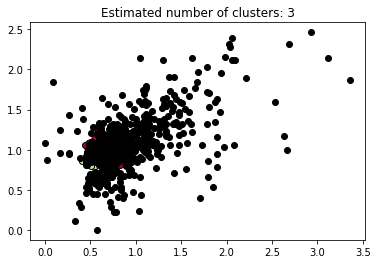

In [1022]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

# code is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
# Take the data from the loans_train_prepared normalised data set
X = data

# DBScan does not require the number of clusters to be specified
# Instead, we are required to enter
# epsilon the neighbourhood neighborhood radius
# the minumum number of points which will make a point a central point
db = DBSCAN(eps=0.2, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()





### Findings: ep=0.2, min_pts=10

The algorithm has found three clusters given a small radius and a min of 10 points for a cluster.  However, the number of points that do not fit into the three clusters, i.e is considered noise, is far too large 558 points of 614.

We need to increase the size of epsilon to reduce the noise count.

### eps = 1.0 - large eps value, min_samples = 10


Estimated number of clusters: 15
Estimated number of noise points: 294


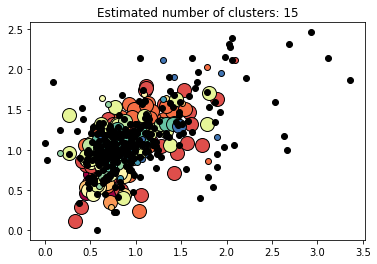

In [1023]:
# code is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

db = DBSCAN(eps=1, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Findings: ep=1.0, min_pts=10

The algorithm has found 15 clusters given a large radius and a min of 10 points for a cluster.   The noise count has been reduced from 557 to 294, which is still large.

Let us increase the min number of samples from 10 to 25

### eps = 1.0 - large eps value, min_samples = 25

Estimated number of clusters: 3
Estimated number of noise points: 449


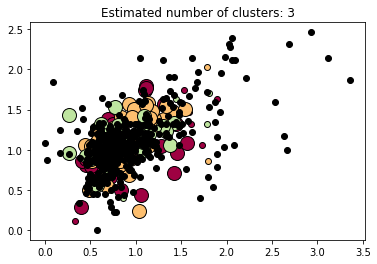

In [1024]:
# code is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

db = DBSCAN(eps=1, min_samples=25).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Findings: ep=1.0, min_pts=25

The algorithm has found 3 clusters again, given a large radius and a min of 25 points for a cluster.   The noise count has been reduced from 557 to 449, which is very large.

Finally, let us try a medium value for epsilon and a number of samples = 10

### eps = 0.5 - medium eps value, min_samples = 10

Estimated number of clusters: 10
Estimated number of noise points: 373


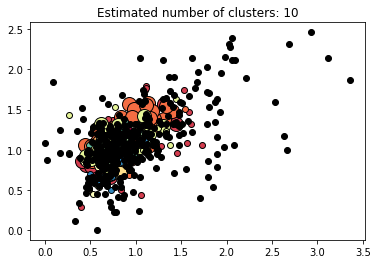

In [1025]:
# code is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

db = DBSCAN(eps=0.5, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Conclusions for DBScan algorithm

The algorithm is frustrating in ways as one can see what is trying to achieve, but this can results in a lot of points being considered noise (outliers).  This results in a low degree of confidence in the cluster identification and count.   Ideally one would like to see a low value of noise points.

The DBScan suggests the data has either 3 or 10 clusters based on the data we supplied for epsilon and min_points.


# Gaussian Mixture Modelling Algorithm

We run this algorithm purely for curiousity to establish if another algorithm can suggest different clusters for various number of components.  We test with values of 2,3, and 10

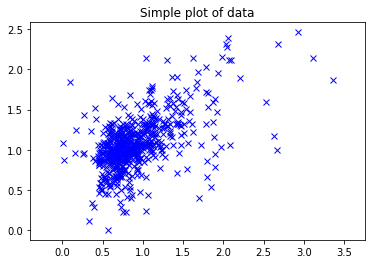

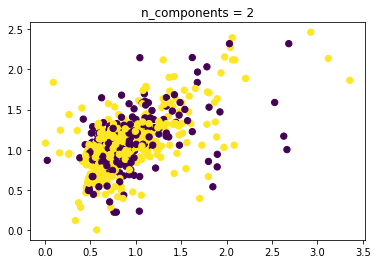

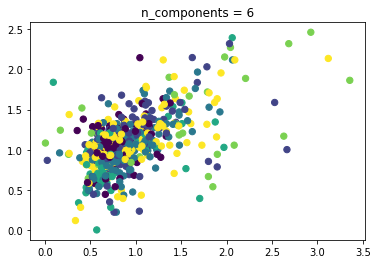

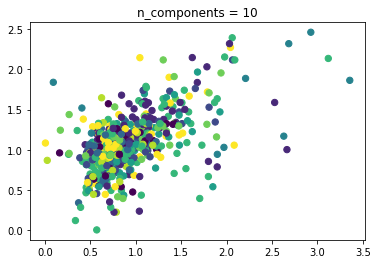

In [1026]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
 
#X_train = np.load('data.npy')
url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/loans_train_prepared.csv'
df = pd.read_csv(url_train, index_col=0)
X = np.array(df.values, dtype=float)

plt.plot(X[:,0], X[:,1], 'bx')
plt.title("Simple plot of data")
plt.axis('equal')
plt.show()


gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.title("n_components = 2")
plt.show()

gmm = mixture.GaussianMixture(n_components=6, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.title("n_components = 6")
plt.show()

gmm = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.title("n_components = 10")
plt.show()


# Overall Conclusion
Tasks 2, 3 and 4 were completed modelling the loans dataset with a set of clustering algorithms

*   k-means
*   DBScan
*   Gaussian Mixture Modelling

The unsupervised learning algorithm suggested an optimum k value = 6.  This did not yield any clear conclusions.  When k-2, we could conclude a difference between property location urban / semi-urban

It would be interesting to see what happens for other values of k, but this exercise demonstrates the importance of not jumping to conclusions when using unsupervised machine pattern matching algorithms.


